In [1]:
import matplotlib.pyplot as plt

# Parsing

In [2]:
with open("data/input5.txt") as f:
    ls = f.readlines()
    ls = [l.rstrip("\n") for l in ls]

inseeds = ls[0].split(": ")[1].split(" ")
inseeds = [int(ins) for ins in inseeds]

maps = {}
tempdata = []
newmap = False
mapname = ""
for l in ls[1:]:
    if l=="":
        maps[mapname] = tempdata
        tempdata = []
        newmap = True
    else:
        if newmap:
            newmap = False
            mapname = (l.split(" ")[0].split("-")[0], l.split(" ")[0].split("-")[2])
        else:
            nbr1 = int(l.split(" ")[1])
            nbr2 = int(l.split(" ")[0])
            rng = int(l.split(" ")[2])
            tempdata.append((nbr1, nbr2, rng))
maps[mapname] = tempdata
del maps[""]

# Part 1

In [3]:
types = ["seed", "soil", "fertilizer", "water", "light", "temperature", "humidity", "location"]
results = [[ins] for ins in inseeds]
for i in range(len(types)-1):
    first = types[i]
    second = types[i+1]
    for j, res in enumerate(results):
        found = False
        for nbr1, nbr2, rng in maps[(first, second)]:
            if res[-1]<nbr1+rng and res[-1] >= nbr1:
                diff = res[-1] - nbr1
                results[j].append(nbr2+diff)
                found = True
                break
        if not found:
            results[j].append(results[j][-1])

locs = [res[-1] for res in results]
print(min(locs))

261668924


# Part 2

In [4]:
inseeds = ls[0].split(": ")[1].split(" ")
inseeds = [int(ins) for ins in inseeds]
ranges = [inseeds[i] for i in range(1,20,2)]
inseeds = [inseeds[i] for i in range(0,20,2)]

def rangeoverlap(inrng, nbr1, nbr2, rng):
    oldmin = inrng[0]
    oldmax = inrng[1]
    if oldmax<nbr1:
        return None
    if oldmin>nbr1+rng-1:
        return None
    overlapmin = max(oldmin, nbr1)
    overlapmax = min(oldmax, nbr1+rng-1)
    diff1 = overlapmin - nbr1
    diff2 = overlapmax - nbr1

    inleft = []
    if overlapmax==oldmax and overlapmin==oldmin:
        pass
    elif overlapmin==oldmin:
        inleft.append((overlapmax+1, oldmax-overlapmax))
    elif overlapmax==oldmax:
        inleft.append((oldmin, overlapmin-oldmin))
    else:
        inleft.append((oldmin, overlapmin-oldmin))
        inleft.append((overlapmax+1, oldmax-overlapmax))
    return (nbr2 + diff1, nbr2 + diff2), inleft

def check_lo(leftovers,nbr1,nbr2,rng, i, results):
    templo = []
    found = False
    for inrng in leftovers:
        ovrl = rangeoverlap(inrng, nbr1, nbr2, rng)
        if ovrl is not None:
            found = True
            results[i+1].append(ovrl[0])
            for nbr1_,rng_ in ovrl[1]:
                templo.append((nbr1_,nbr1_+rng_-1))
    if not found:
        templo = leftovers
    return templo, results

types = ["seed", "soil", "fertilizer", "water", "light", "temperature", "humidity", "location"]
results = [[] for _ in types]
for ins, rng in zip(inseeds, ranges):
    results[0].append((ins, ins + rng-1))
for i in range(len(types)-1):
    first = types[i]
    second = types[i+1]
    for insrng in results[i]:
        leftovers = [insrng]
        los = True
        for nbr1, nbr2, rng in maps[(first, second)]:
            templo, results = check_lo(leftovers, nbr1, nbr2, rng, i, results)
            if len(templo)>0:
                leftovers = templo
            else:
                los = False
                break
        if los:
            for minnbr,maxnbr in leftovers:
                results[i+1].append((minnbr,maxnbr))

locs = [res[0] for res in results[-1]]
print(min(locs))

24261545


# Overkill

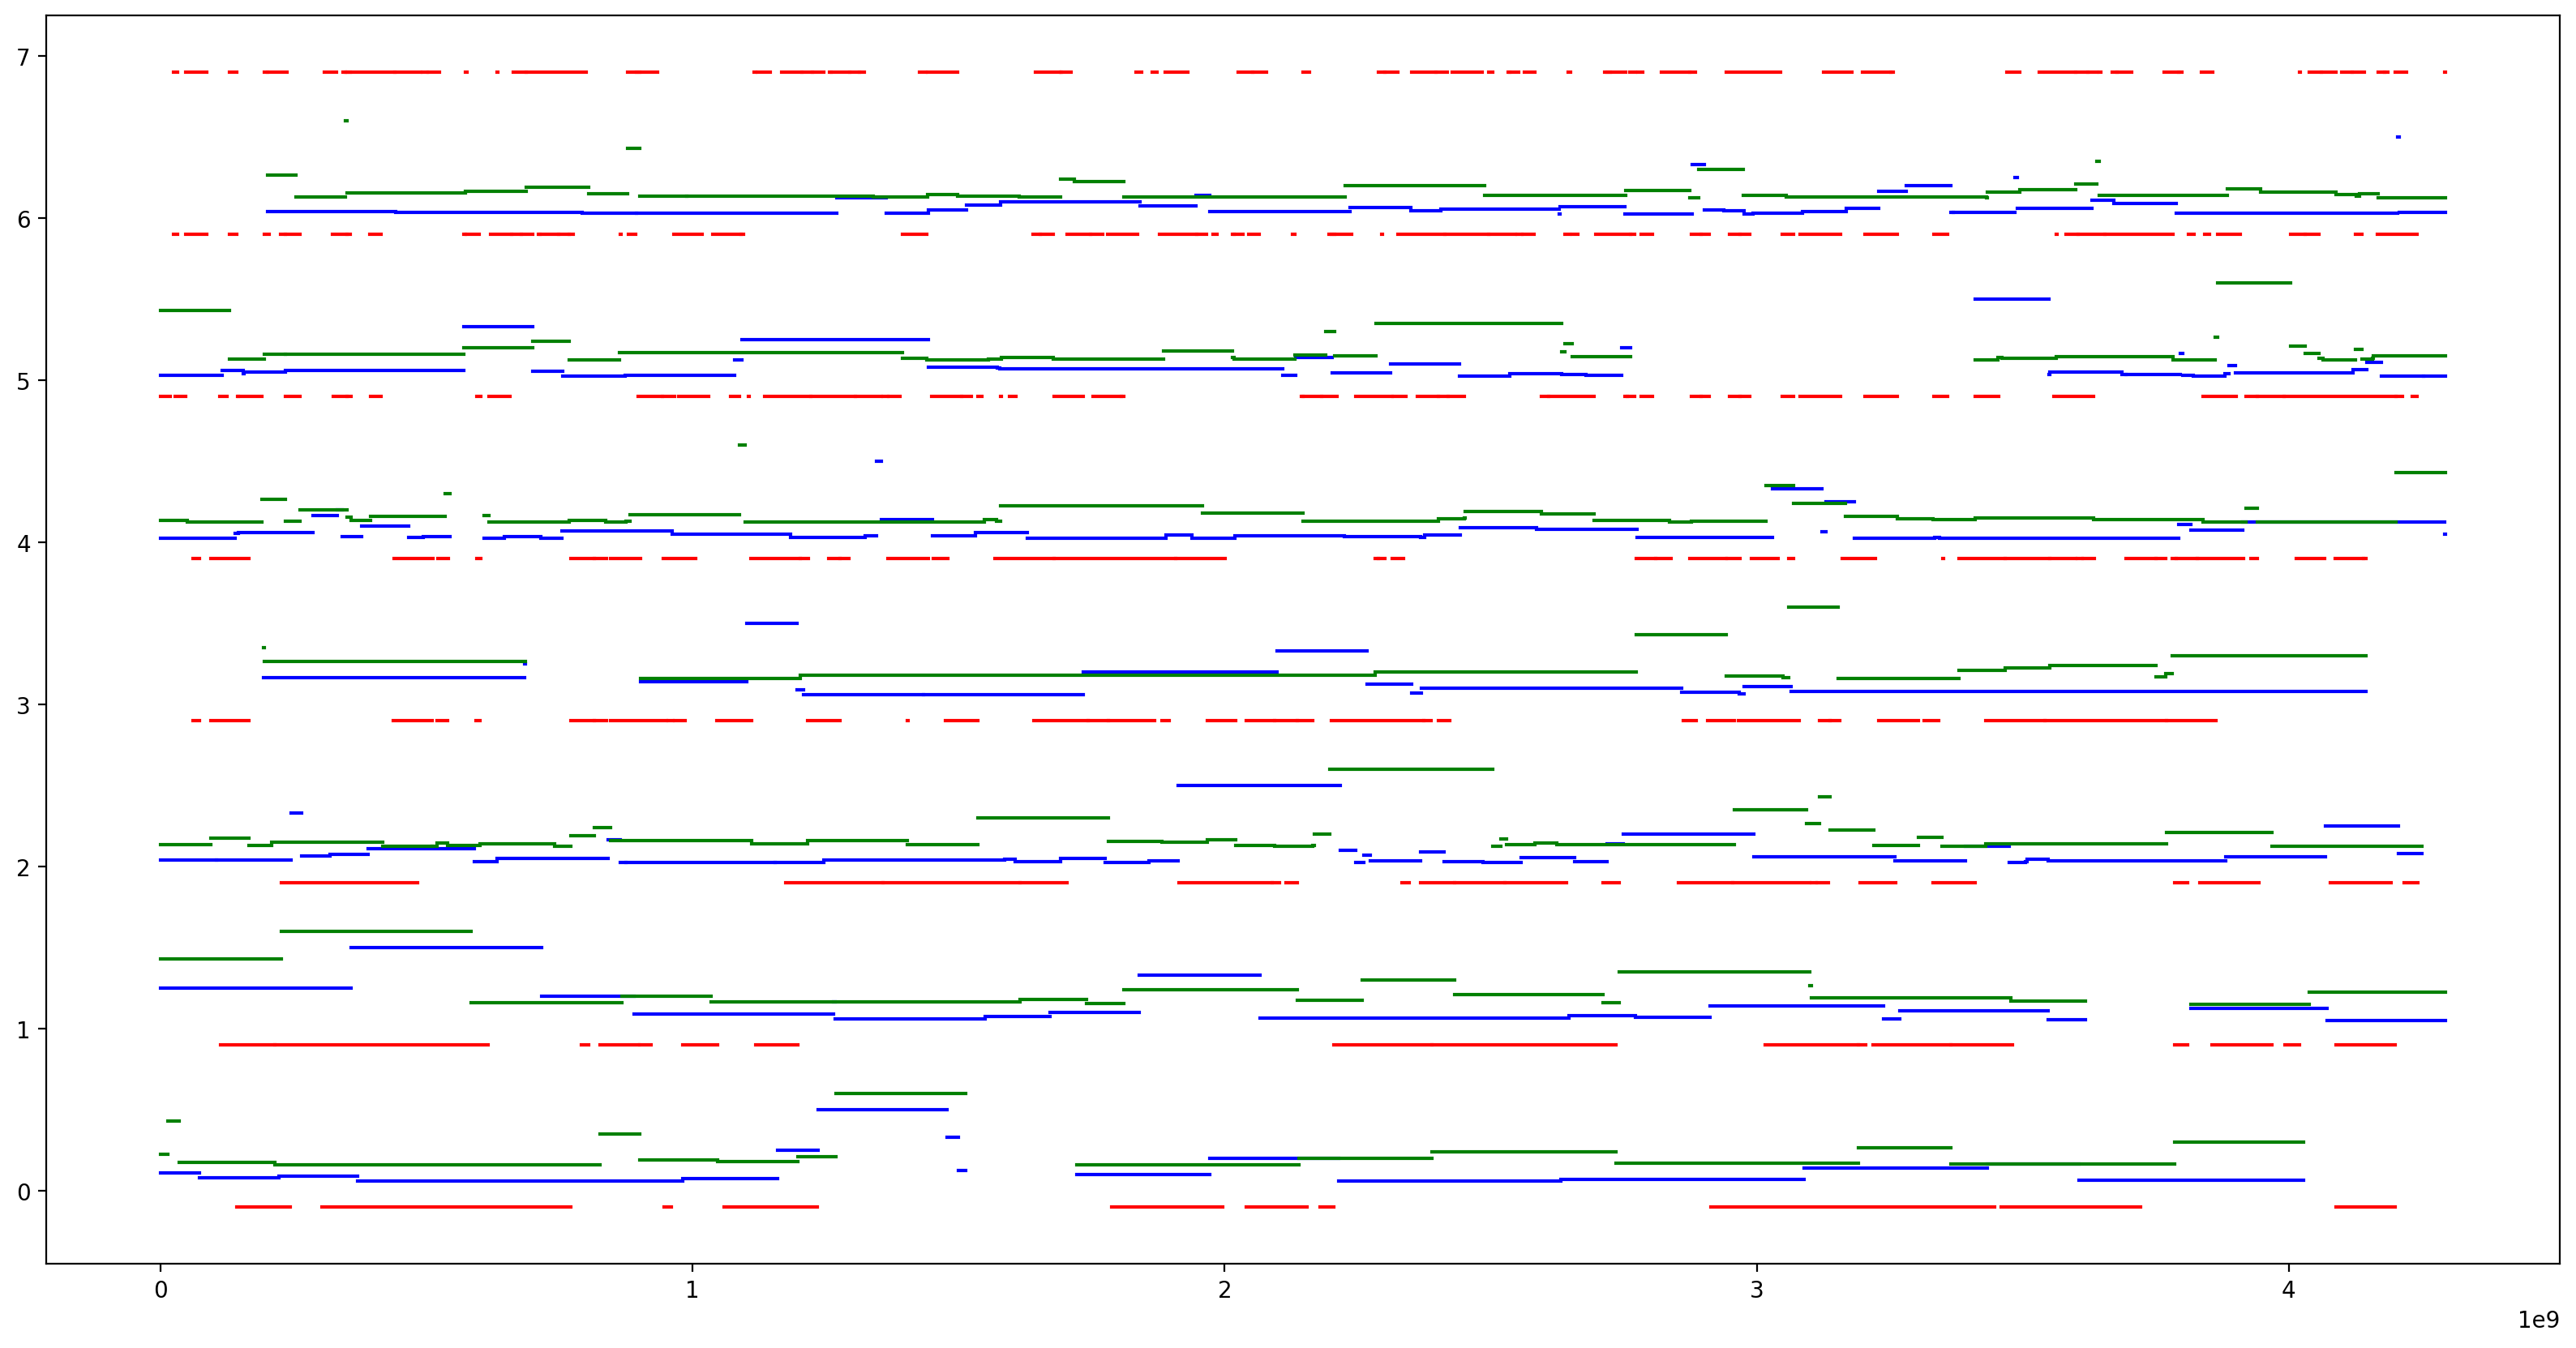

In [5]:
fig,ax = plt.subplots(figsize=(20,10),dpi=200)
for i in range(len(types)-1):
    first = types[i]
    second = types[i+1]
    j = 1
    for nbr1, nbr2, rng in maps[(first, second)]:
        ax.plot([nbr1, nbr1+rng-1], [i+1/(j+1), i+1/(j+1)], c="b")
        ax.plot([nbr2, nbr2+rng-1], [i+1/(j+1)+0.1, i+1/(j+1)+0.1], c="g")
        j += 1
for ins, rng in zip(inseeds, ranges):
    ax.plot([ins, ins+rng-1], [-0.1, -0.1], c="r")
for i in range(1,len(results)):
    for minnbr,maxnbr in results[i]:
        ax.plot([minnbr, maxnbr], [i-0.1, i-0.1], c="r")
plt.show()